<a href="https://colab.research.google.com/github/piyush-cosmo/WoC_sdd_test/blob/master/Object_Detection_static_image_mobileDet_WoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References :

[MobileDet_Conversion_TFLite](https://colab.research.google.com/github/sayakpaul/Adventures-in-TensorFlow-Lite/blob/master/MobileDet_Conversion_TFLite.ipynb#scrollTo=uH5jzM0Dr2JU)

[Optimizing MobileDet for Mobile Deployments](https://sayak.dev/mobiledet-optimization/)

[COCO 2014 Train/Val annotations](http://images.cocodataset.org/annotations/annotations_trainval2014.zip)

[GitHub Release](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/managing-releases-in-a-repository)

# Requirements :

[train_sampe_dataset_only_person](https://github.com/piyush-cosmo/WoC_sdd_test/releases/download/v0.0.2/train_samples.zip)

[COCO label](https://github.com/piyush-cosmo/WoC_sdd_test/releases/download/v0.0.1/coco_labels_1.txt)

[Image](https://github.com/tensorflow/models/raw/master/research/object_detection/test_images/image2.jpg)

The pretrained model used here is SSD_MobileDet_cpu_coco.

# Process Involved :

1. Converted the model checkpoint into compatible TFLite model graph.
2. Created my own representative dataset by subsampling 200 images from COCO dataset.
3. Quantized the TfLite model graph into TFLite model by using representative dataset.
4. Run inference on image.

# Model Benchmarks

Input Image : [Image](https://github.com/tensorflow/models/raw/master/research/object_detection/test_images/image2.jpg)

<table>
<tr>
<th>Model Name</th>
<th>Model Size(MB)</th>
<th>Elapsed Time(s)</th>
</tr>
<tr>
<td>SSD_mobileDet_cpu_coco_int8</td>
<td>4.9</td>
<td>1223.54</td>
</tr>
<tr>
<td>SSD_mobileDet_cpu_coco_fp16</td>
<td>8.2</td>
<td>83.92</td>
</tr>
<tr>
<td>SSD_mobileDet_cpu_coco_dr</td>
<td>4.9</td>
<td>1240.47</td>
</tr>
</table>

Best Result : SSD_mobileDet_cpu_coco_fp16

# Converting model SSD_MobileDet_cpu_coco to TFLite model graph

As MobileDet model was trained in TensorFlow 1 we will need this for the conversion process.

### Setup


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

!git clone --quiet https://github.com/tensorflow/models.git

TensorFlow 1.x selected.


### Installing TFOD Api

In [ ]:
%%bash
pip install --upgrade pip

cd models/research

# Compile protos
protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
cp object_detection/packages/tf1/setup.py .
python -m pip install --use-feature=2020-resolver .

  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1606851 sha256=18c54c46c90a161650ca5d69ac9df4cd6185421da5a18ec3fc61423161c2c75f
  Stored in directory: /tmp/pip-ephem-wheel-cache-t2awweho/wheels/16/63/fd/1293066bf448f757979af1b45c59b0e33b46f12d4454d12fde
Successfully built object-detection


### Fetching model SSD_MobileDet_cpu_coco checkpoint

The checkpoint of pretrained model on COCO dataset

In [ ]:
mobiledet_checkpoint_name = "ssd_mobiledet_cpu_coco" 

checkpoint_dict = {
    "ssd_mobiledet_cpu_coco": "http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_cpu_320x320_coco_2020_05_19.tar.gz"
}

folder_name_dict = {
    "ssd_mobiledet_cpu_coco": "ssdlite_mobiledet_cpu_320x320_coco_2020_05_19"
}

checkpoint_selected = checkpoint_dict[mobiledet_checkpoint_name]
folder_name = folder_name_dict[mobiledet_checkpoint_name]

# Get the pre-trained MobileDet checkpoints
!rm -rf folder_name
!wget -q $checkpoint_selected -O checkpoints.tar.gz
!tar -xvf checkpoints.tar.gz

ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.ckpt-400000.data-00000-of-00001
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.ckpt-400000.index
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.ckpt-400000.meta
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pbtxt
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pb
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/pipeline.config
ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/model.tflite


### Converting model checkpoints to TFLite compatible model graph

In [ ]:
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
        --pipeline_config_path=$folder_name/pipeline.config \
        --trained_checkpoint_prefix=$folder_name/model.ckpt-400000 \
        --output_directory=$folder_name \
        --add_postprocessing_op=true
print("======Graph generated========")
!ls -lh $folder_name/*.pb

Instructions for updating:
Please use `layer.__call__` method instead.
W1225 10:30:33.544023 139640192513920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1225 10:30:37.103995 139640192513920 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1225 10:30:37.192206 139640192513920 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1225 10:30:37.279262 139640192513920 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

# Converting TFLite model graph to TFLite model

We first need to restart our Colab Runtime because we are switching to TensorFlow 2 for the conversion process.

### Setup

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

import os

### Download the COCO dataset

In [ ]:
!mkdir train_samples

In [ ]:
#@title Download the COCO `train2014` training annotations and subsample 200 images for person only
#@markdown Run this if you want to create your own dataset, uncomment it and run this cell
from pycocotools.coco import COCO
import requests
import random

# instantiate COCO specifying the annotations json path
coco = COCO('/content/gdrive/MyDrive/annotations_trainval2014/annotations/instances_train2014.json')
# Specify a list of category names of interest
catIds = coco.getCatIds(catNms=['person'])
# Get the corresponding image ids and images using loadImgs
imgIds = coco.getImgIds(catIds=catIds)
images = coco.loadImgs(imgIds)

random.shuffle(images)

two_hundred_images = images[:200]



for im in two_hundred_images:
    img_data = requests.get(im['coco_url']).content
    with open('/content/train_samples/' + im['file_name'], 'wb') as handler:
        handler.write(img_data)

loading annotations into memory...
Done (t=20.14s)
creating index...
index created!


In [ ]:
!wget -q https://github.com/piyush-cosmo/WoC_sdd_test/releases/download/v0.0.2/train_samples.zip
!unzip "/content/train_samples.zip" -d "/content/train_samples/"

Archive:  /content/train_samples.zip
   creating: /content/train_samples/content/train_samples/
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000127932.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000260888.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000404739.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000578119.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000167862.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000219141.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000056677.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000204775.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000000558851.jpg  
  inflating: /content/train_samples/content/train_samples/COCO_train2014_000

### Model to be quantized

In [ ]:
model_checkpoint_name = "ssd_mobiledet_cpu_coco" 
model_dict = {
    "ssd_mobiledet_cpu_coco": "ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pb"
}
model_to_be_quantized = model_dict[model_checkpoint_name]
if os.path.getsize(model_to_be_quantized) > 0:
    print(f"We are quantizing: {model_dict[model_checkpoint_name]}")
else:
    print("Model not found!")

We are quantizing: ssdlite_mobiledet_cpu_320x320_coco_2020_05_19/tflite_graph.pb


### Representative Dataset

Integer Quantization needs representative dataset

In [ ]:
rep_ds = tf.data.Dataset.list_files("/content/train_samples/content/train_samples/*.jpg")
HEIGHT, WIDTH = 320, 320

def representative_dataset_gen():
    for image_path in rep_ds:
        img = tf.io.read_file(image_path)
        img = tf.io.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        resized_img = tf.image.resize(img, (HEIGHT, WIDTH))
        resized_img = resized_img[tf.newaxis, :]
        yield [resized_img]

### Quantize

In [ ]:
#@title Quantization Strategy selection
quantization_strategy = "fp16" #@param ["dr", "fp16", "int8"]

converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file=model_to_be_quantized, 
    input_arrays=['normalized_input_image_tensor'],
    output_arrays=['TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3'],
    input_shapes={'normalized_input_image_tensor': [1, 320, 320, 3]}
)
converter.allow_custom_ops = True
if quantization_strategy=="dr":
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
elif quantization_strategy=="fp16":
    converter.target_spec.supported_types = [tf.float16]
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
elif quantization_strategy=="int8":
    converter.inference_input_type = tf.uint8
    converter.quantized_input_stats = {"normalized_input_image_tensor": (128, 128)}
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

tflite_filename = model_checkpoint_name + "_" + quantization_strategy + ".tflite"
open(tflite_filename, 'wb').write(tflite_model)
print(f"TFLite model generated with {quantization_strategy}")
!ls -lh $tflite_filename

TFLite model generated with fp16
-rw-r--r-- 1 root root 8.2M Dec 25 10:32 ssd_mobiledet_cpu_coco_fp16.tflite


# Inference

### Setup

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import cv2
import re
import time
import numpy as np

from PIL import Image

### Utility functions for loading COCO labels and setting input and output tensor and also having bounding boxes 

In [ ]:
# Download the COCO labels
!wget -q https://github.com/piyush-cosmo/WoC_sdd_test/releases/download/v0.0.1/coco_labels_1.txt

def load_labels(path):
  """Loads the labels file. Supports files with or without index numbers."""
  with open(path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    labels = {}
    for row_number, content in enumerate(lines):
      pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
      if len(pair) == 2 and pair[0].strip().isdigit():
        labels[int(pair[0])] = pair[1].strip()
      else:
        labels[row_number] = pair[0].strip()
  return labels

def set_input_tensor(interpreter, image):
  """Sets the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Returns the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  set_input_tensor(interpreter, image)
  interpreter.invoke()

  # Get all output details
  boxes = get_output_tensor(interpreter, 0)
  classes = get_output_tensor(interpreter, 1)
  scores = get_output_tensor(interpreter, 2)
  count = int(get_output_tensor(interpreter, 3))

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
          'bounding_box': boxes[i],
          'class_id': classes[i],
          'score': scores[i]
      }
      results.append(result)
  return results

# Load the labels and define a color bank
LABELS = load_labels("/content/coco_labels_1.txt")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), 
                            dtype="uint8")

### Load a TFLite model

In [ ]:
tflite_model = "ssd_mobiledet_cpu_coco_fp16.tflite" #@param ["ssd_mobiledet_cpu_coco_dr.tflite", "ssd_mobiledet_cpu_coco_fp16.tflite", "ssd_mobiledet_cpu_coco_int8.tflite"] 
interpreter = tf.lite.Interpreter(model_path=tflite_model)
interpreter.allocate_tensors()
_, HEIGHT, WIDTH, _ = interpreter.get_input_details()[0]['shape']
print(f"Height and width accepted by the model: {HEIGHT, WIDTH}")

Height and width accepted by the model: (320, 320)


### Download an image

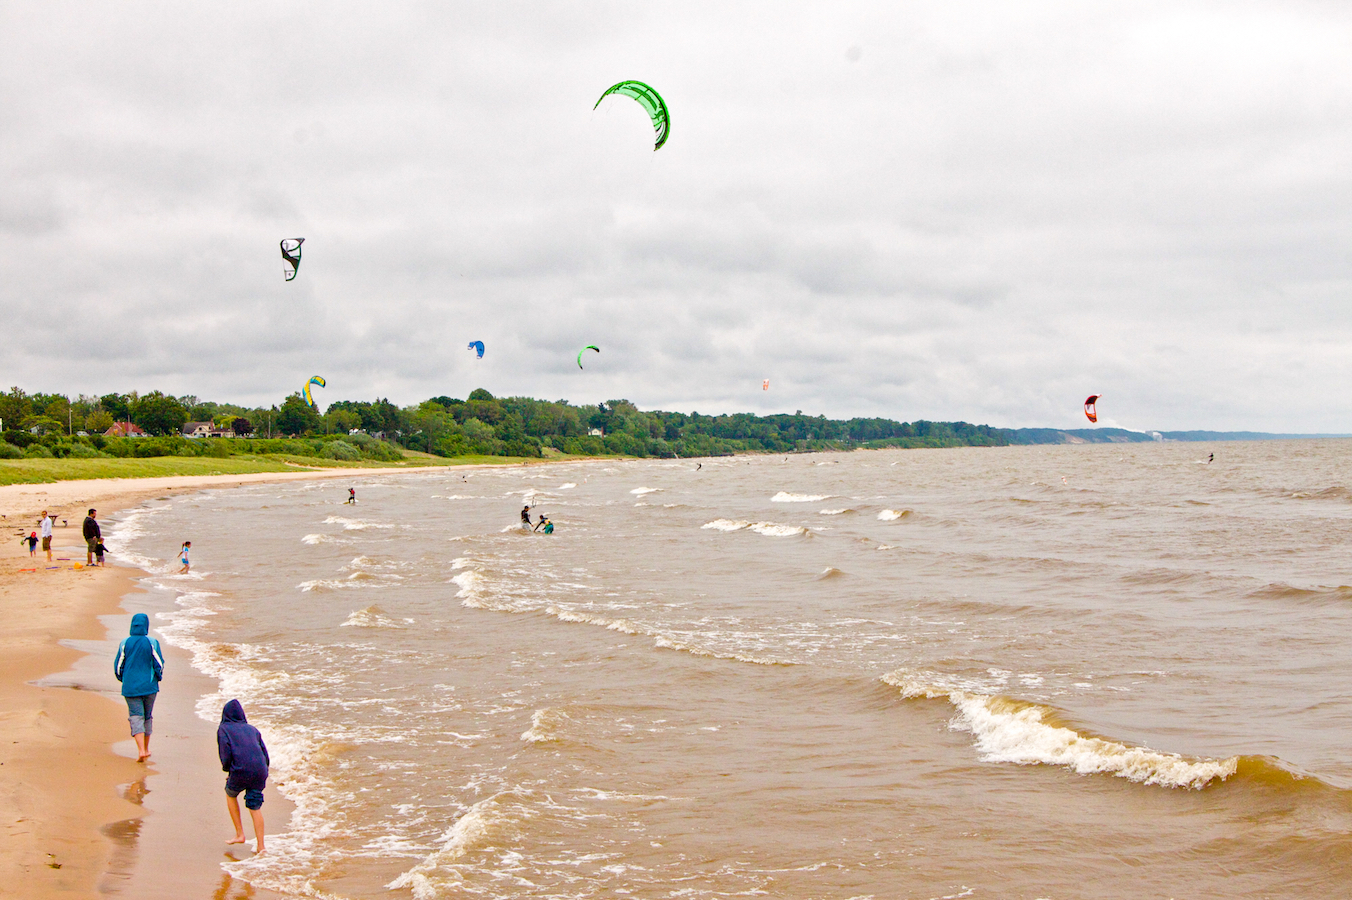

In [ ]:
IMAGE_PATH = "https://github.com/tensorflow/models/raw/master/research/object_detection/test_images/image2.jpg"

!wget -q -O image.png $IMAGE_PATH
Image.open('image.png')

### Image Preprocessing utils

In [ ]:
def preprocess_image(image_path, type=np.float32):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img, channels=3)
    original_image = img
    if type == np.uint8:
        img = tf.image.convert_image_dtype(img, tf.uint8)
    else:
        img = tf.image.convert_image_dtype(img, tf.float32)
    resized_img = tf.image.resize(img, (HEIGHT, WIDTH))
    resized_img = resized_img[tf.newaxis, :]
    return resized_img, original_image

### Inference Utils

In [ ]:
def display_results(image_path, interpreter, threshold=0.32):
    # Load the input image and preprocess it
    input_type = interpreter.get_input_details()[0]['dtype']
    preprocessed_image, original_image = preprocess_image(image_path, input_type)

    # =============Perform inference=====================
    start_time = time.monotonic()
    results = detect_objects(interpreter, preprocessed_image, threshold=threshold)
    print(f"Elapsed time: {(time.monotonic() - start_time)*1000} miliseconds")

    # =============Display the results====================
    original_numpy = original_image.numpy()
    for obj in results:
        # Convert the bounding box figures from relative coordinates
        # to absolute coordinates based on the original resolution
        ymin, xmin, ymax, xmax = obj['bounding_box']
        xmin = int(xmin * original_numpy.shape[1])
        xmax = int(xmax * original_numpy.shape[1])
        ymin = int(ymin * original_numpy.shape[0])
        ymax = int(ymax * original_numpy.shape[0])

        # Grab the class index for the current iteration
        idx = int(obj['class_id'])
        # Skip the background
        if idx >= len(LABELS):
            continue

        # draw the bounding box and label on the image
        color = [int(c) for c in COLORS[idx]]
        cv2.rectangle(original_numpy, (xmin, ymin), (xmax, ymax), 
                    color, 2)
        y = ymin - 15 if ymin - 15 > 15 else ymin + 15
        label = "{}: {:.2f}%".format(LABELS[obj['class_id']],
            obj['score'] * 100)
        cv2.putText(original_numpy, label, (xmin, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # return the final image
    if type==np.float32:
        original_numpy = (original_numpy * 255).astype(np.uint8)
    return original_numpy

Elapsed time: 92.5403119999828 miliseconds


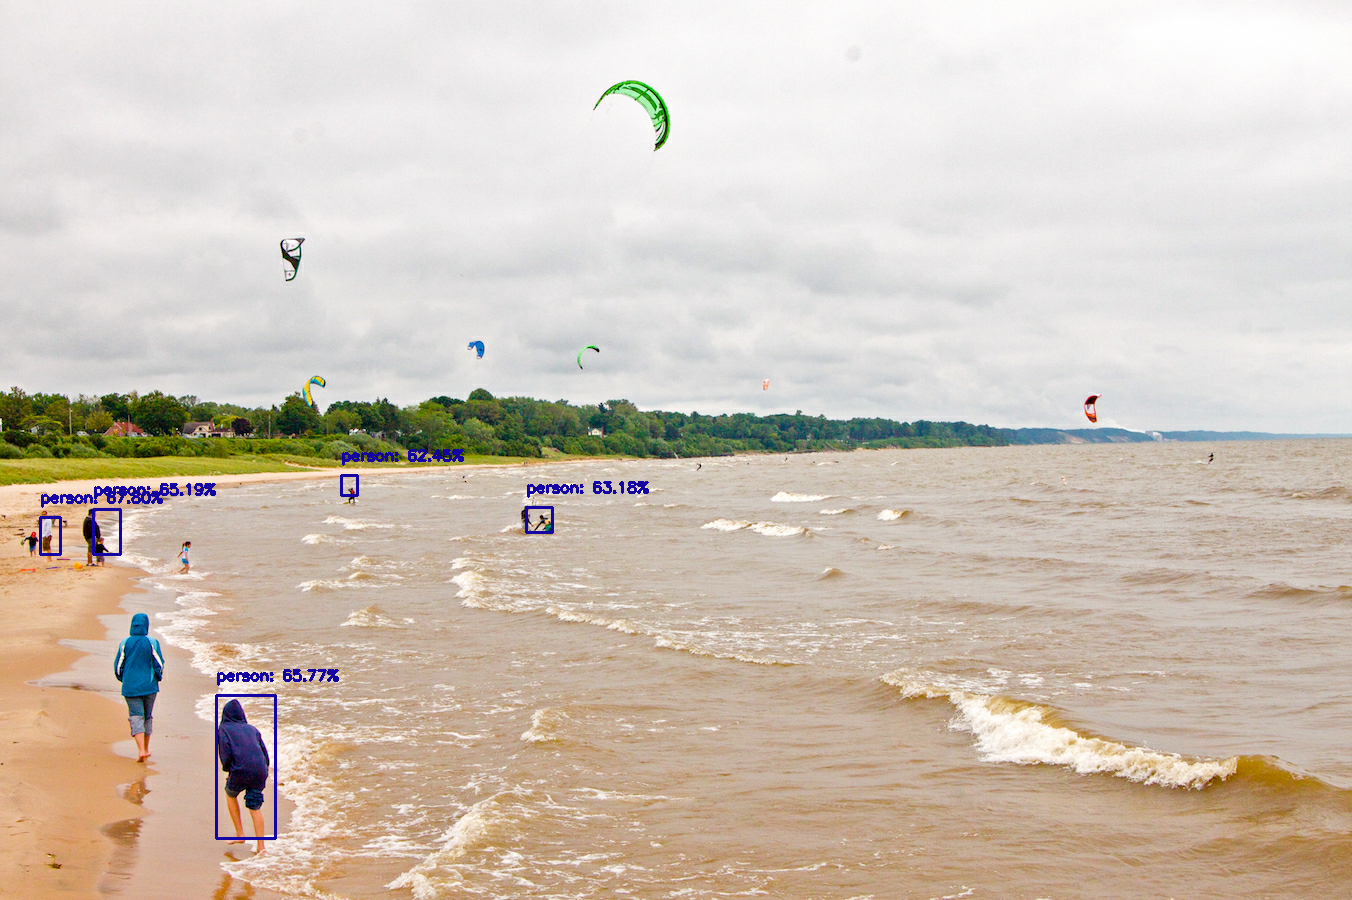

In [ ]:
resultant_image = display_results("image.png", interpreter, threshold=0.32)
Image.fromarray(resultant_image)